In [1]:

import pandas as pd
import numpy as np
import random
from scipy.stats import loguniform, lognorm
from scipy import stats
import time
import math
from matplotlib import pyplot as plt
import os.path

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [4]:
N= 700
T= 5

# Load and format the data

In [5]:
import pandas as pd
import numpy as np

def npy2df(input_file, return_gene_info=False):
    """
    Load the npy file with X number of bursting parameter estimation for a given gene. 
    if return_gene_info is True : 
        return the df containing the estimation, the gene index number (starting from 1, not 0) and a gene array of some sort?
    else: return the dataframe with the parameter estimation as column and each estimation attemps as rows
        
    """
    gene_no, gene, result = np.load(input_file, allow_pickle='True')
    
    result_flatten = result.flatten()
    df = pd.DataFrame([x for x in result_flatten])
    
    if return_gene_info:
        return(df, gene_no, gene)
    else:
        return(df)

In [6]:
# !ls data/test

In [7]:
df, gene_name, gene_data = npy2df(f'data/test/gene_Fn1_cast_N{N}_T{T}.npy', True)
df

,kon,ron,koff,roff,mu,delta,dist
0,4.797844,8.147473,1.210276,1.402749,41.106289,1.0,0.095782
1,1.089940,2.640716,3.462180,9.760404,66.272195,1.0,0.385252
2,10.825820,8.700555,3.695687,1.998363,35.280664,1.0,0.317722
3,8.632630,8.682611,3.848039,3.074496,38.908635,1.0,0.180622
4,9.913260,10.235561,8.404861,8.563995,46.328811,1.0,0.119959
...,...,...,...,...,...,...,...
3495,4.852137,4.149538,4.585281,1.340088,25.399944,1.0,0.528125
3496,4.253000,6.144780,6.942993,8.375299,47.046685,1.0,0.329328
3497,10.825820,8.700555,3.695687,1.998363,35.280664,1.0,0.317722
3498,8.046570,12.704852,1.969370,2.869619,54.009755,1.0,0.238322


In [8]:
def BFandBS(df):
    """
    input is the dataframe containing the parameters as columns.
    need column named 'koff', 'roff', 'kon', 'ron' 
    
    compute burst frequency and burst size from the parameters
    """
    df['tau_off']= df['kon']/df['ron']
    df['tau_on'] = df['koff']/df['roff']
    df['bf'] = 1./(df['tau_on'] + df['tau_off'])
    df['bs'] = df['mu'] * df['tau_on']

In [9]:
BFandBS(df)
# df

In [10]:
df['log_kon'] = [np.log10(x) for x in df['kon']]
df['log_koff'] = [np.log10(x) for x in df['koff']]

In [11]:
df['log_bs'] = [np.log10(x) for x in df['bs']]
df['log_bf'] = [np.log10(x) for x in df['bf']]

In [12]:
# df

# Smooth kernel density 

Kernel density estimate KDE


In [13]:
from scipy.stats import gaussian_kde
def best_parameters(df, density_kernel_name=None, save_kde=False):
    """
    return the index for the best parameters.
    
    if density_kernel_name is None , we recompute the gaussian kde and if save_kde is a str. 
    Save the kde in df using save_kde as column name
    """
    
    if density_kernel_name is None:
        # Calculate the point density
        xy = np.vstack([df['bs'],df['bf']])
#         print(xy)
        z = gaussian_kde(xy)(xy)
#         print(z)
        if save_kde is not False:
            df[save_kde] = z
            
    else:
        z = df[density_kernel_name]
    
    return(np.where(z == np.amax(z))[0][0])

        

In [14]:
bp = best_parameters(df, save_kde='density_kernel')
print(f'best_parameters = {bp}')
bp_data = df.iloc[bp].copy()
bp_data

best_parameters = 435


kon                3.603967
ron                5.446346
koff               1.478714
roff               1.998926
mu                47.743411
delta              1.000000
dist               0.290915
tau_off            0.661722
tau_on             0.739754
bf                 0.713533
bs                35.318400
log_kon            0.556781
log_koff           0.169884
log_bs             1.548001
log_bf            -0.146586
density_kernel     0.051716
Name: 435, dtype: float64

In [22]:
bp_data = bp_data.to_frame().transpose().rename(index={bp: f'N{N}_T{T}'})


AttributeError: 'DataFrame' object has no attribute 'to_frame'

In [23]:
bp_data['process_time'] = 2

    samp_arr = bp_data.index[0].split('_')
    num_samples.append(int(samp_arr[0][1:]) * int(samp_arr[1][1:]))

In [29]:
samp_arr = bp_data.index[0].split('_')
num_samples = int(samp_arr[0][1:]) * int(samp_arr[1][1:])
bp_data['num_samples'] = num_samples

In [30]:
bp_data

,kon,ron,koff,roff,mu,delta,dist,tau_off,tau_on,bf,bs,log_kon,log_koff,log_bs,log_bf,density_kernel,process_time,num_samples
N700_T5,3.603967,5.446346,1.478714,1.998926,47.743411,1.0,0.290915,0.661722,0.739754,0.713533,35.3184,0.556781,0.169884,1.548001,-0.146586,0.051716,2,3500


In [16]:
# if os.path.exists('test/test.csv'):
#     df_NT = pd.read_csv('test/test.csv', index_col=[0])
#     df_new = pd.concat([df_NT, bp_data])
#     df_new.to_csv('test/test.csv')
# else:
#     bp_data.to_csv('test/test.csv')


In [17]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.color_palette("viridis")

def plot_kde(df, bs, bf, kde="density_kernel",
             title=None, dot_size=4, colormap='viridis',
             best_param=True,
             linestype='-', color_line='grey',
             norm_scale=True,
             show=True,
             save=None):
    """
    

    --> put the line with best parameter as an option..
    
    --> later we need to create a wrapper function to give a adata objet + a gene name
    
    df
    bs
    df
    kde="density_kernel"
    title
    size
    colormap
    best_param
    linestype
    color_line
    norm_scale
    show
    save
    """
    
    # scatter plot
    if norm_scale:
        fig = sns.scatterplot(data=df, x=bf, y=bs,
                              hue=kde, size_norm=(0,1),
                              palette=colormap, s=dot_size)
    else:
        fig = sns.scatterplot(data=df, x=bf, y=bs,
                              hue=kde, hue_norm=(np.min(df['density_kernel']),
                                                 np.max(df['density_kernel'])),
                              palette=colormap, s=dot_size)
    
    if title is not None: 
        fig.set_title(title)
    
    #plt.legend(loc=legend_loc)
    plt.legend(bbox_to_anchor=(1.05, 1),
               loc='upper left',
               borderaxespad=0,
              title='kernel density')
    
    if best_param : 
    
        # Add the best parameter estimation based on the density kernel
        index_max_parameter = best_parameters(df, save_kde="density_kernel")
        xmax = df[bs][index_max_parameter]
        ymax = df[bf][index_max_parameter]
        fig.axvline(ymax, color="grey", linestyle="-.", linewidth=0.5) #linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
        fig.axhline(xmax, color="grey", linestyle="-.", linewidth=0.5)
    
    
    # plot / saving settings
    if save is not None:
        plt.savefig(save, bbox_inches='tight')
    if show :
        plt.show()

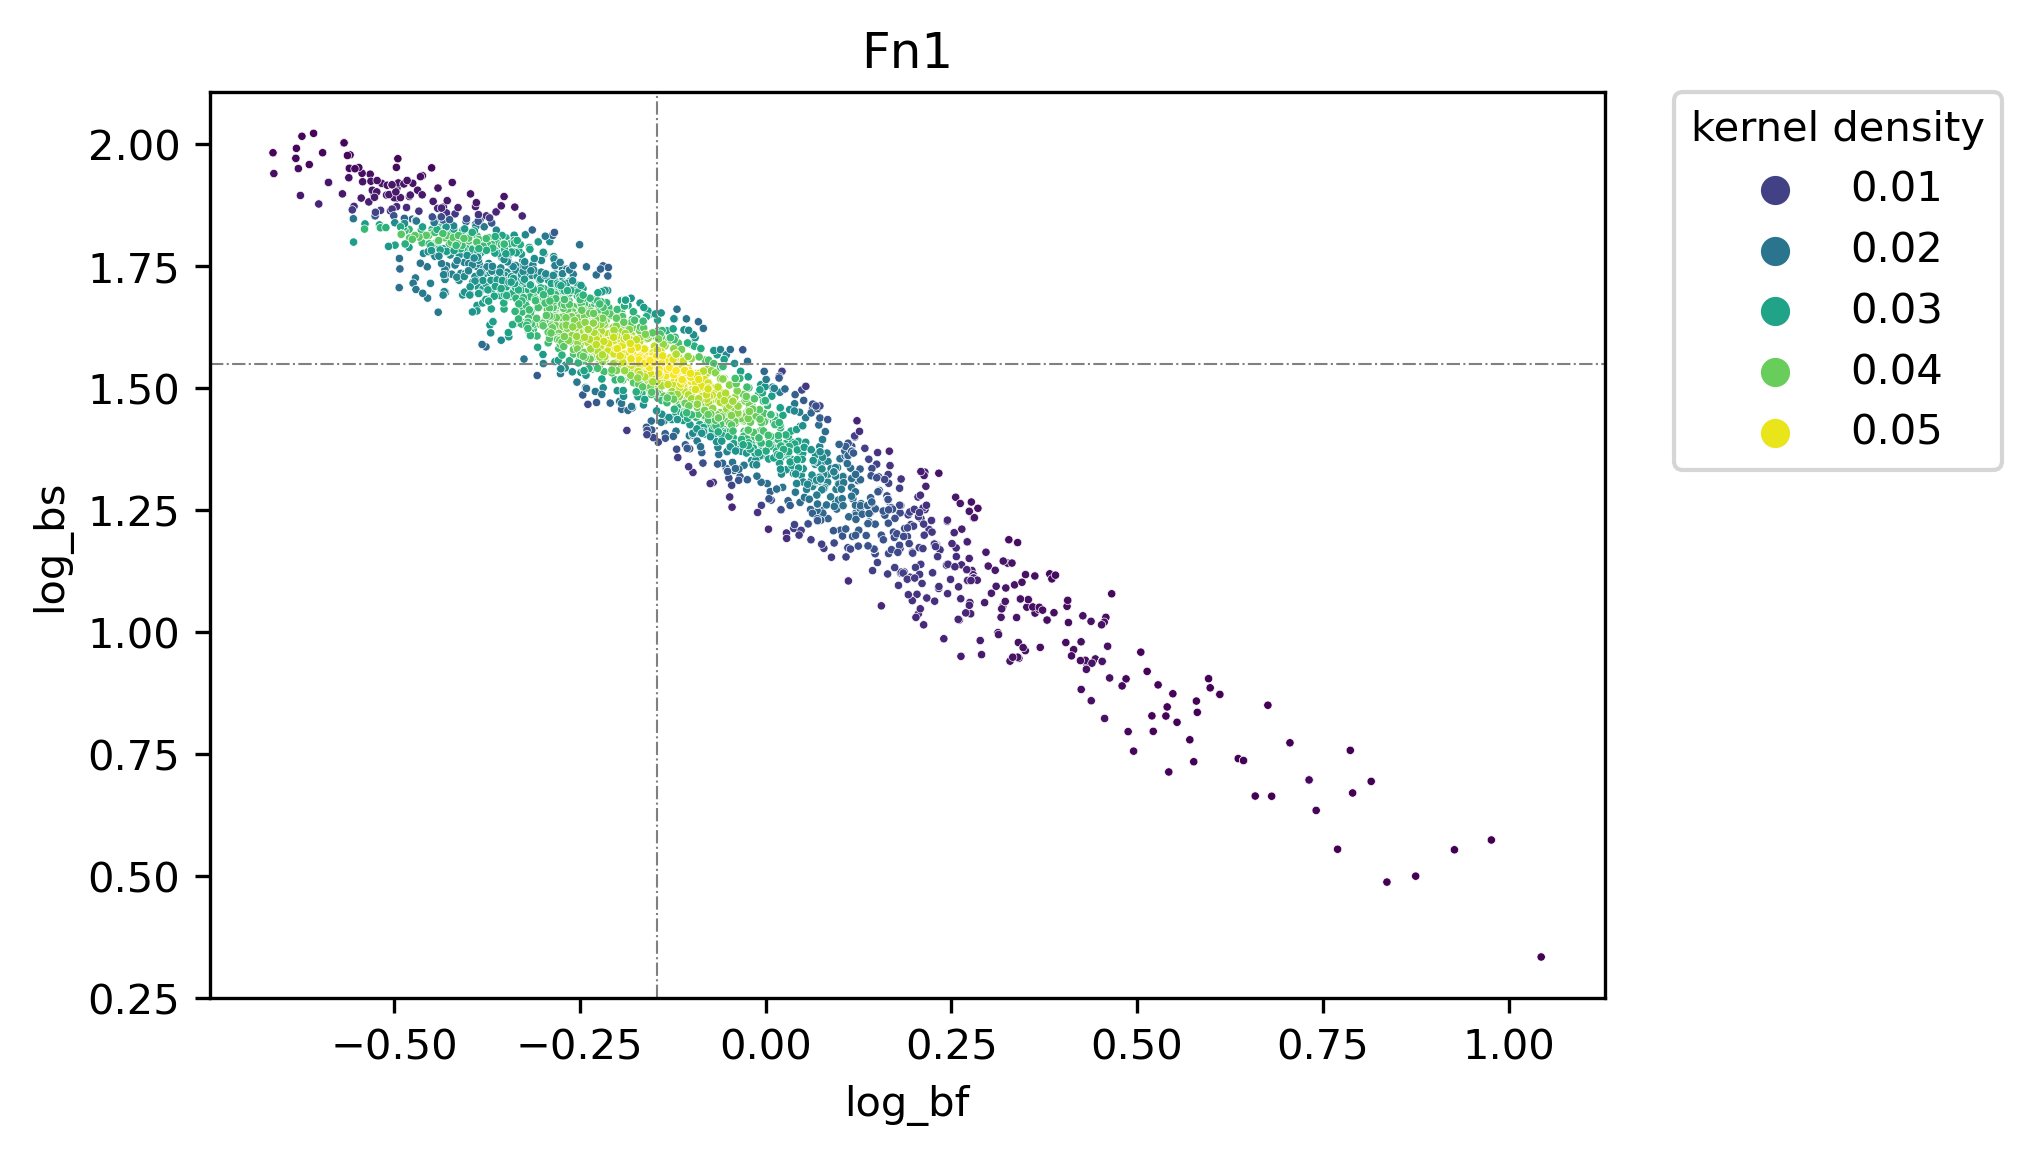

In [18]:
plot_kde(df, bs="log_bs", bf="log_bf", title=gene_name, dot_size=4, save=f"figures/{gene_name}_kde_scatterplot.png")

In [19]:
# normalise the kernel density scale between 0 and 1 
# sns.scatterplot?

In [20]:
# test = np.array([[11.15495104],[1.98579645]])
# gaussian_kde(test)